0. Import Library

In [1]:
# Code Here
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stats

1. จงสร้าง Function ชื่อ create_data() ซึ่งจะ Return x_train เป็นจำนวนเต็มจากการสุ่มในช่วง 0-100 ในรูปแบบ Matrix ขนาด nx2 และ y_train เป็นจำนวนเต็มจากการสุ่มโดยมีค่า 0, 1 ในรูปแบบ Matrix ขนาด n

Ex. 

    create_data(5) 
        x_train = [[10, 20], [0, 100], [5, 8], [1, 2], [80, 56]]
        y_train = [1, 0, 1, 1, 0]

In [2]:
def create_data(n):
    # Code Here
    x_train = np.random.randint(0,100,(n,2))
    y_train = np.random.randint(0,2,n)
    return x_train, y_train

In [3]:
x_train, y_train = create_data(1000)

2. จงสร้าง Function plot_scatter() ซึ่งจะแสดงผล Scatter Plot จากข้อมูล Input ซึ่งจะมีสีของจุดแตกต่างกันตามค่าของ y_train โดยรับ Parameter 2 ค่า คือ x_train และ y_train ซึ่งเป็นชุดข้อมูลที่ได้จากการสุ่มในข้อที่ 1

In [4]:
def plot_scatter(x,y):
    #Code Here
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.show()

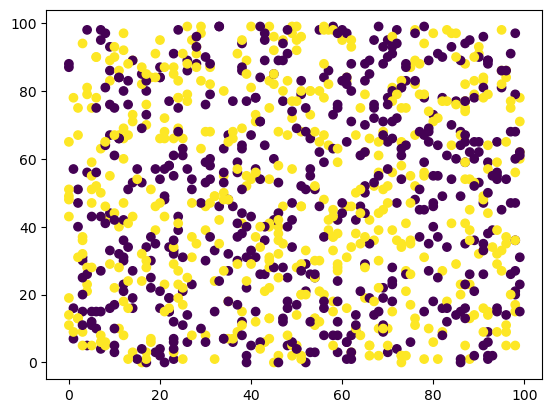

In [5]:
plot_scatter(x_train, y_train)

3. จงสร้าง Function ชื่อ cal_distance_manhattan() ซึ่งจะ Return ระยะห่างระหว่างข้อมูล Input และ ชุดข้อมูลจากข้อที่ 1 ในรูปแบบของ Matrix ขนาด 1xn ซึ่งคำนวณด้วยวิธี Manhattan Distance โดยรับ Parameter 3 ค่า คือ x1, x2 ซึ่งเป็นเลขจำนวนเต็มในช่วง 0-100 และ x_train ซึ่งเป็นชุดข้อมูลที่ได้จากการสุ่มในข้อที่

Ex. 

    cal_distance_manhattan(1, 2, x_train) = [27, 99, 10, 0, 133]

In [6]:
def cal_distance_manhattan(x1, x2, x_train):
    #Code Here
    point = np.array([x1,x2])
    new = x_train - point
    new = np.abs(new)
    distance = new[:,0] + new[:,1]
    return distance

In [7]:
x_train_distance_manhattan = cal_distance_manhattan(5, 8, x_train)

4. จงสร้าง Function ชื่อ cal_distance_euclidean() ซึ่งจะ Return ระยะห่างระหว่างข้อมูล Input และ ชุดข้อมูลจากข้อที่ 1 ในรูปแบบของ Matrix 
ขนาด 1xn ซึ่งคำนวณด้วยวิธี Euclidean Distance โดยรับ Parameter 3 ค่า คือ x1, x2 ซึ่งเป็นเลขจำนวนเต็มในช่วง 0-100 และ x_train ซึ่งเป็นชุดข้อมูลที่ได้จากการสุ่มในข้อที่ 1

Ex. 

    cal_distance_euclidean(1, 2, x_train) = [20.12461179749811, 98.00510190801293, 7.211102550927979, 0.0, 95.6922149]

In [8]:
def cal_distance_euclidean(x1,x2,x_train):
    #Code Here
    point = np.array([x1,x2])
    new = x_train - point
    distance = np.sqrt(new[:,0] + new[:,1])
    return distance

In [9]:
x_train_euclidean = cal_distance_euclidean(5, 8, x_train)

C:\Users\gooddee\AppData\Local\Temp\ipykernel_20936\3074546383.py:5: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(new[:,0] + new[:,1])


5. จงสร้าง Function ชื่อ predict() ซึ่งจะ Return ค่า mode ของค่า y_train ที่ มีค่า distance น้อยที่สุดจำนวน n ตัว (ถ้ามีจำนวนเท่ากันให้เลือกค่าที่มี Frequency สูงที่สุด จาก y_train) โดยรับ Parameter 3 ค่า คือ distance ซึ่งเป็นค่าระยะห่างของจุด, y_train ซึ่งเป็นชุดข้อมูลที่ได้จากการสุ่มในข้อที่ 1 และ n_neighbor ซึ่งเป็นจำนวนค่า distance ที่เราจะพิจารณา (เรียงจากน้อยไปมาก)

EX. 

    predict(x_train_distance_manhattan, y_train, n_neighbor=3) จะทำการเลือก distance ที่มีค่าน้อยที่สุดจำนวน 3 ตัว และนำค่า 
    y_train ที่ตำแหน่งเดียวกันกับ distance นั้นมาพิจารณา เช่น [27, 99, 10, 0, 133] จะพิจารณา ค่า y ของ distance 0, 10, 27 ซึ่งมีค่า 
    1, 1, 1 ดังนั้น ค่าที่ return จะมีค่า 1

In [10]:
def predict(distance, y_train, n_neighbor):
    #Code Here
    unique = set(distance)
    sort_con = ''
    for i in sorted(unique):
        sort_con = distance <= i
        if np.count_nonzero(sort_con) >= n_neighbor:
            break
    new = y_train[sort_con][:n_neighbor]
    print(new)
    predict_class = stats.mode(new) 
    return predict_class

In [11]:
print(predict(x_train_euclidean, y_train, n_neighbor=5))

[1 1 1 1 0]
1


In [12]:
print(predict(x_train_distance_manhattan, y_train, n_neighbor=5))

[0 0 1 1 1]
1


6. จงสร้างฟังก์ชันชื่อ fibonacci() ซึ่งรับค่าตัวเลข 1 ตัว และคืนค่าจำนวนฟีโบนัชชีของตัวเลขนำเข้าดังกล่าว โดยจำนวนฟีโบนัชชีนั้นมีนิยามของความสัมพันธ์ว่า จำนวนถัดไปเท่ากับผลบวกของจำนวนสองจำนวนก่อนหน้า และสองจำนวนแรกก็คือ 0 และ 1 ตามลำดับ และลำดับของจำนวนดังกล่าวก็จะเรียกว่า ลำดับฟีโบนัชชี โดยจำนวนฟีโบนัชชีนั้น จะเริ่มนับจาก 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

    จำนวน Fibonacci นั้น มีนิยามดังนี้
        F(0) = 0
        F(1) = 1
        F(n) = F(n - 1) + F(n - 2)
        
*** คะแนนพิเศษเพิ่มเติม สำหรับนศ.ที่ไม่ใช้ loop ภายในฟังก์ชัน

In [13]:
def fibonacci(n):
    #Code Here
    if n > 1:
        fibo = fibonacci(n-1) + fibonacci(n-2)
    else:
        fibo = n
    return fibo

In [14]:
print(fibonacci(10))

55


7. จงสร้างฟังก์ชัน factorial() ซึ่งรับค่าตัวเลข 1 ตัว และคืนค่าจำนวนแฟคทอเรียลของตัวเลขนำเข้าดังกล่าว 
    
    โดยนิยามของ factorial คือ
        0! = 1
        n! = n * (n - 1)!
        
*** คะแนนพิเศษเพิ่มเติม สำหรับนศ.ที่ไม่ใช้ loop ภายในฟังก์ชัน

In [15]:
def factorial(n):
    #Code Here
    fac = math.factorial(n)
    return fac
print(factorial(12))

479001600


In [16]:
print(fibonacci(12))

144


8. ในการทอนเงินให้กับลูกค้าแต่ละครั้ง เงินจำนวนเท่ากันสามารถมีวิธีการทอนเงินด้วยเหรียญได้หลายแบบ เช่น เงินทอนจำนวน 15 บาท สามารถทอนได้ดังนี้
        เหรียญ 10 บาทจำนวน 1 เหรียญ และ เหรียญ 5 บาทจำนวน 1 เหรียญ
        เหรียญ 10 บาทจำนวน 1 เหรียญ, เหรียญ 2 บาทจำนวน 2 เหรียญ, เหรียญ 1 บาทจำนวน 1 เหรียญ
        เหรียญ 5 บาทจำนวน 3 เหรียญ ฯลฯ
        
        โดยการทอนเงินแต่ล่ะวิธี จะมีจำนวนเหรียญรวมแตกต่างกัน เพื่อเป็นการอำนวยความสะดวกแก่ลูกค้า จงเขียนฟังก์ชัน exchange() ที่รับจำนวนเงินที่ต้องทอนและคืนค่าผลลัพธ์เป็นวิธีทอนเงินที่มีจำนวนเหรียญรวมน้อยที่สุด โดยเหรียญที่สามารถใช้ทอนเงินได้มีค่าดังต่อไปนี้ 10 บาท, 5 บาท, 2 บาท, 1 บาท, 0.5 บาท (50 สตางค์) และ 0.25 บาท (25 สตางค์)
        ตัวอย่างข้มูลนำเข้า: จำนวนเงินที่ต้องทอน เช่น 10.25 บาท, 6.75 บาท หรือ 3 บาท
        ตัวอย่างผลลัพธ์: วิธีการทอนเงินที่มีจำนวนเหรียญรวมน้อยที่สุด เช่น (10x1)+(0.25x1), (5x1)+(1x1)+(0.5x1)+(0.25x1) หรือ (2x1)+(1x1) ตามลำดับ

In [17]:
def exchange(money):
    #Code Here
    dct = {}
    coin = [10,5,2,1,0.2,0.25]
    ans = ''
    for i in coin:
        dct[i] = money // i
        money %= i
    for i,j in dct.items():
        if j:
            ans += f'({i}x{int(j)})+'
    ans = ans[:-1]
    print(ans)

In [18]:
exchange(24.25)

(10x2)+(2x2)+(0.2x1)
